In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RDKit WARNING: [16:50:09] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
with open('chembl_dopamin_d2_rp_ki.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligands = [Chem.MolFromSmiles(m["Smiles"]) for m in reader]
drugbank_sdf = Chem.SDMolSupplier("drugbank.sdf")
db = [d for d in drugbank_sdf if d != None]

RDKit ERROR: [16:50:13] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:50:13] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:50:13] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:50:13] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:50:13] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:50:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:50:13] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:50:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:50:13] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:50:13] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:50:13] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:50:13] Can't kek

In [3]:
def getDescriptors(molecules):
    df = pd.DataFrame()
    df["rings"] = [Chem.GetSSSR(m) for m in molecules]
    df["rotatable_bonds"] = [Chem.CalcNumRotatableBonds(m)for m in molecules]
    df["heavy_atoms"] = [m.GetNumHeavyAtoms() for m in molecules]
    df["HBA"] = [rdescriptors.CalcNumLipinskiHBA(m) for m in molecules]
    df["HBD"] = [rdescriptors.CalcNumLipinskiHBD(m) for m in molecules]
    df["MW"] = [rdescriptors.CalcExactMolWt(m) for m in molecules]
    df["TPSA"] = [rdescriptors.CalcTPSA(m) for m in molecules]
    df["logP"] = [Descriptors.MolLogP(m) for m in molecules]
    return df

In [4]:
d2_ligands = getDescriptors(ligands)

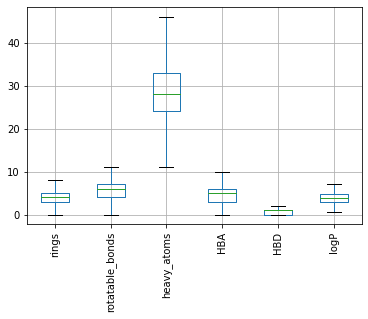

In [5]:
#vizosky
fig, ax = plt.subplots()
d2_ligands[["rings", "rotatable_bonds", "heavy_atoms", "HBA", "HBD", "logP"]].boxplot(ax=ax, showfliers=False, rot=90) #, "MW", "TPSA"
plt.show()

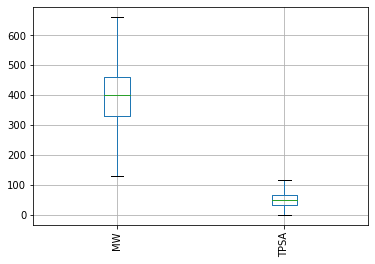

In [6]:
fig, ax = plt.subplots()
d2_ligands[["MW", "TPSA"]].boxplot(ax=ax, showfliers=False, rot=90) #, 
plt.show()

In [7]:
db_ligands = getDescriptors(db)
db_ligands

,rings,rotatable_bonds,heavy_atoms,HBA,HBD,MW,TPSA,logP
0,6,66,155,57,31,2178.985813,901.57,-8.11643
1,6,31,91,32,20,1268.641439,495.89,-3.10570
2,4,19,74,26,18,1068.426955,435.41,-4.13203
3,6,38,102,31,20,1429.669818,495.67,-0.50613
4,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...
7108,1,0,8,1,1,128.002892,20.23,2.04560
7109,3,3,24,9,5,340.079432,149.82,-1.32270
7110,6,14,79,27,13,1114.554641,403.10,1.54710
7111,0,13,21,5,0,330.147689,83.50,-0.00030


In [8]:
db_ligands["dataset"] = "drugbank"
d2_ligands["dataset"] = "d2_dopamin" 
all_ligands = pd.concat([db_ligands,d2_ligands])
all_ligands_long = pd.melt(all_ligands, id_vars=["dataset"], value_vars=["rings", "rotatable_bonds", "heavy_atoms", "HBA", "HBD", "MW", "TPSA", "logP"] )
all_ligands_long

,dataset,variable,value
0,drugbank,rings,6.00000
1,drugbank,rings,6.00000
2,drugbank,rings,4.00000
3,drugbank,rings,6.00000
4,drugbank,rings,1.00000
...,...,...,...
140683,d2_dopamin,logP,4.85930
140684,d2_dopamin,logP,4.08150
140685,d2_dopamin,logP,4.20990
140686,d2_dopamin,logP,2.79850


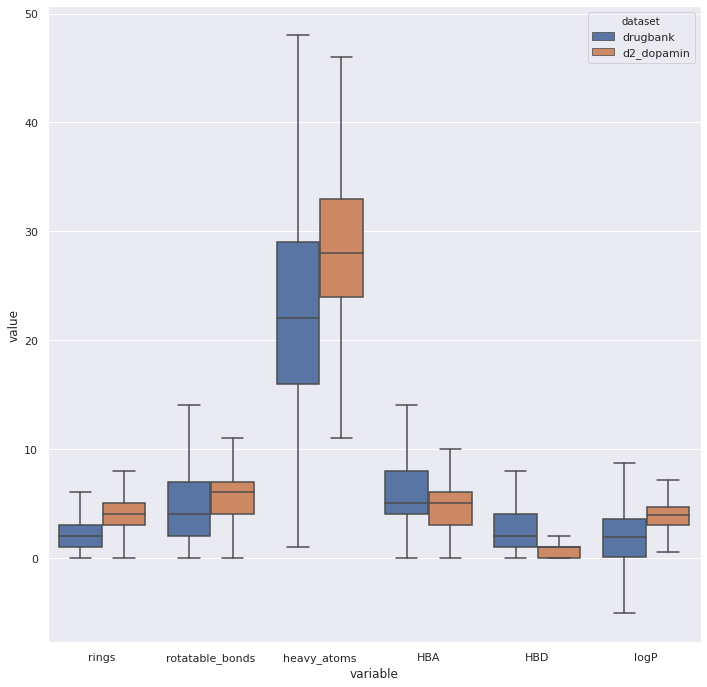

In [9]:
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(y="value", x="variable", hue="dataset", data = all_ligands_long.loc[all_ligands_long["variable"]. isin(["rings", "rotatable_bonds", "heavy_atoms", "HBA", "HBD", "logP"])], showfliers=False)

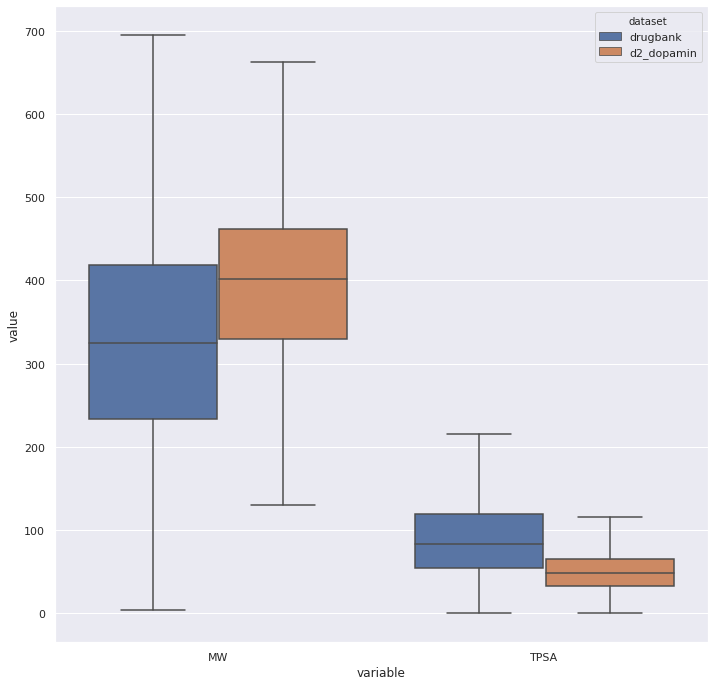

In [10]:
sns.boxplot(y="value", x="variable", hue="dataset", data = all_ligands_long.loc[all_ligands_long["variable"]. isin(["MW", "TPSA"])], showfliers=False)

Ligandy dopaminového d2 receptoru jsou obecně větší než molekuly z drugbanku (# kruhů, molekulová hmotnost, #atomů), což jsem tak nějak očekávala vzhledem k výsledkům předchozího cvičení. Dalším (dle mého) rozdílem oproti sloučeninám v Drugbank je velikost rozdělovacího koeficientu. Látky působící na dopaminový d2 receptor jsou lipofilnější (hydrofobnější). (Což nějak tak odpovídá tomu, co vím o dopaminových receptorech, jsou to receptory CNS, kdyby chtěly ligandy působit třeba na mozek, musí projít hematoencefalickou barierou (dále BBB - blood brain barier, kterou prochází hlavně lipofilní látky)). Další změna je v TPSA. Podle [tohohle odkazu](https://en.wikipedia.org/wiki/Polar_surface_area) souvisí PSA se schopností molekuly procházet buněčnými membránami - čím méně polárních cancourů na povrchu tím lépe bude procházet membránami. V daném odkazu se uvádí, že pro průchod BBB by látky měly mít hodnoty TPSA pod 90 Å^2, což odpovídá mým "znalostem" o receptoru (a data to potvrzují, tak od oka odhaduji, že ligandy mívají TPSA +/- kolem 50 až 60 Å^2). Ligandy dopaminového d2 receptoru budou nejspíš obecně tvořit méně vodíkových vazeb.

In [12]:
hetatm = [rdescriptors.CalcNumHeteroatoms(m)/m.GetNumHeavyAtoms() for m in ligands if m.GetNumHeavyAtoms()>0]
hetatm_db = [rdescriptors.CalcNumHeteroatoms(m)/m.GetNumHeavyAtoms() for m in db]
hetcycles = [rdescriptors.CalcNumHeterocycles(m)/rdescriptors.CalcNumRings(m) for m in ligands if rdescriptors.CalcNumRings(m)>0]
hetcycles_db = [rdescriptors.CalcNumHeterocycles(m)/rdescriptors.CalcNumRings(m) for m in db if rdescriptors.CalcNumRings(m)>0]

In [13]:
df_het = pd.DataFrame(data=[{"set":"dopamin_d2", "variable":"hetatm_ratio", "value": x} for x in hetatm])
df_het = df_het.append(pd.DataFrame(data=[{"set":"drugbank", "variable":"hetatm_ratio", "value": x} for x in hetatm_db]), ignore_index = True)
df_het = df_het.append(pd.DataFrame(data=[{"set":"dopamin_d2", "variable":"hetcycle_ratio", "value": x} for x in hetcycles]), ignore_index = True)
df_het = df_het.append(pd.DataFrame(data=[{"set":"drugbank", "variable":"hetcycle_ratio", "value": x} for x in hetcycles_db]), ignore_index = True)
df_het

,set,variable,value
0,dopamin_d2,hetatm_ratio,0.217391
1,dopamin_d2,hetatm_ratio,0.285714
2,dopamin_d2,hetatm_ratio,0.285714
3,dopamin_d2,hetatm_ratio,0.160000
4,dopamin_d2,hetatm_ratio,0.241379
...,...,...,...
34036,drugbank,hetcycle_ratio,0.000000
34037,drugbank,hetcycle_ratio,0.000000
34038,drugbank,hetcycle_ratio,0.666667
34039,drugbank,hetcycle_ratio,0.500000


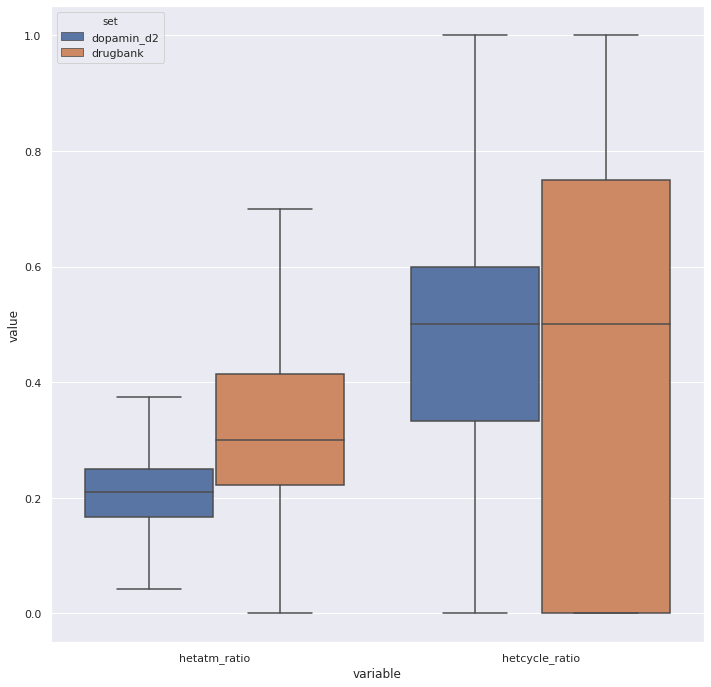

In [14]:
sns.boxplot(y="value", x="variable", hue="set", data=df_het, showfliers=False)

Heteroatomů je v ligandech d2 dopaminového receptoru méně, počty v heterocyklech jsou odpovídající. To bude nejspíše důvod menšího počtu akceptorů vodíkové vazby. 